# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.118222e+01     7.551567e+00
 * time: 0.004416942596435547
     1     2.958092e+01     5.431728e+00
 * time: 0.013442039489746094
     2     2.614381e+01     9.490127e+00
 * time: 0.03542208671569824
     3     1.748991e+01     4.251189e+00
 * time: 0.06036806106567383
     4     1.252466e+01     1.224411e+00
 * time: 0.08617496490478516
     5     1.092888e+01     1.013368e+00
 * time: 0.10681700706481934
     6     9.958907e+00     1.991196e+00
 * time: 0.12227606773376465
     7     9.463935e+00     6.884377e-01
 * time: 0.13741707801818848
     8     9.159669e+00     8.699470e-01
 * time: 0.15251994132995605
     9     8.969439e+00     5.184016e-01
 * time: 0.16766905784606934
    10     8.766755e+00     5.315816e-01
 * time: 0.18287110328674316
    11     8.662469e+00     3.830040e-01
 * time: 0.19794893264770508
    12     8.657109e+00     6.766830e-01
 * time: 0.20938801765441895
    13     8.625564e+00     5.782070e-01
 * tim

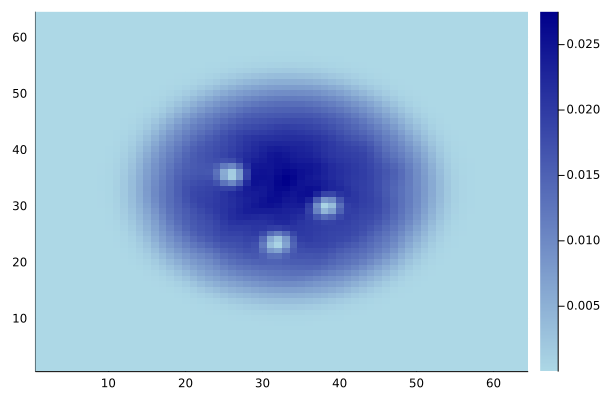

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)